In [1]:
import numpy as np
import pandas as pd
from random import  uniform
import matplotlib.pyplot as plt

# Classe do neurônio de Rosenblatt

In [8]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.carrega_dados()
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
        
    def carrega_dados(self):
        dataset = np.fromfile('dataAll.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados=dataset.reshape(linhas, colunas)
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            print("Pesos: ",self.pesos)
            print("Dado: ",entrada[1:]," Yd: ",yd," Yr: ",yr,"\n")
            
            numero_de_ajustes += 1
            
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                print("Numero de ajustes: ",numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        print("Numero de ajustes: ",numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos

        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        while(self.perceptron() == False):
            self.epocas+=1
            print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        
        self.descobre_x1_x2()
        
        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos: ",sum(self.total_de_ajustes))
            
n = Neuronio()

# Dataset

In [9]:
n.dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

# Pesos iniciais

In [10]:
n.pesos

array([ 0.44945012, -0.42640643,  0.49597218])

# Treinamento

In [11]:
n.treino()

-----------------------------
Época:  1 

Pesos:  [ 0.44945012 -0.42640643  0.49597218]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  1 

Numero de ajustes:  1
-----------------------------
Época:  2 

Pesos:  [  0.54945012  35.95243357 -23.91825782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  0.54945012  35.95243357 -23.91825782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  0.54945012  35.95243357 -23.91825782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  0.54945012  35.95243357 -23.91825782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  1 

Numero de ajustes:  4
-----------------------------
Época:  3 

Pesos:  [   0.64945012  -17.70661643 -100.41400782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  -17.70661643 -100.41400782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  -17.70661643 -100.41400782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  -17.70661643 -100.41400782]
Dado: 

Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  0.84945012 214.57377357 -98.74305782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  1 

Numero de ajustes:  4
-----------------------------
Época:  24 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  160.91472357 -175.23880782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  

Dado:  [-962.2974 -617.048 ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [747.1333 329.7615]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [814.5103 622.8999]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [542.7868 140.7434]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-744.029  -340.5505]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-157.5954  509.7154]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [347.5842 747.5316]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [664.115  443.1572]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-291.7673 -782.0354]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 968.0774 -159.9259]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [713.7451 645

Dado:  [ 979.619  -635.5288]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-842.2857  929.7133]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-455.3137 -947.6706]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-860.305  -348.4992]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 652.0857 -557.9368]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [937.306  -96.8059]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 774.8274 -573.8098]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 145.751  -800.1087]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [573.3428 820.344 ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 679.8148 -477.5763]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 418.3

Dado:  [-436.8324 -948.1057]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-480.5206  352.8055]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [922.994  505.4237]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-221.7721 -667.5838]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 323.1695 -484.0753]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ -63.2091 -821.2304]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 870.4499 -372.2174]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-982.7927   75.426 ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [919.1827 823.1511]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [-748.3868  690.3022]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  214.52637357 -210.93969782]
Dado:  [ 469.4

Dado:  [-291.7673 -782.0354]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [ 968.0774 -159.9259]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [713.7451 645.4212]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [-696.027  -170.8061]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [-651.0622  239.3653]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [-281.1958  593.16  ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [ 423.1377 -875.8632]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [-747.7851  259.2337]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [ 680.9888 -164.8119]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [-455.2463 -656.3593]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  263.54038357 -251.26735782]
Dado:  [  39

Dado:  [-329.078   -63.6951]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [  22.0659 -391.851 ]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [-962.2974 -617.048 ]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [747.1333 329.7615]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [814.5103 622.8999]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [542.7868 140.7434]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [-744.029  -340.5505]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [-157.5954  509.7154]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [347.5842 747.5316]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [664.115  443.1572]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  284.09044357 -274.14072782]
Dado:  [-291.7673 -7

Dado:  [-747.7851  259.2337]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [ 680.9888 -164.8119]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-455.2463 -656.3593]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [  39.5689 -639.266 ]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [361.2056 -32.176 ]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [ 318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-472.6846  -61.0365]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [ -48.6567 -376.8292]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-700.5053 -813.2649]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-476

Dado:  [-394.9066 -240.0938]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [ 258.4948 -287.655 ]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-701.9374 -672.2568]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [227.6702 414.3379]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [581.5522  74.3819]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [ 710.6291 -746.5556]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [365.173  41.143]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [-642.8921 -680.6463]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [   9.036  -158.0587]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [398.2957 118.7159]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  285.35635357 -279.92907782]
Dado:  [655.396   14

Dado:  [-501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [825.987  798.5583]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [ 495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [ 525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-967.347  -366.9538]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-882.0782 -639.5238]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-994.3367  580.7919]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-755.1501  862.7146]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-530.9124 -292.3363]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-58.4576 782.9459]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [ 737.8

Dado:  [ 365.3218 -439.6666]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-729.595   485.7617]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-774.1719  810.4266]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-695.2556  496.0612]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [ 348.5686 -515.4601]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [417.7649 -66.2287]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [664.7495 119.0997]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-29.8922 -47.9733]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-826.7392 -221.7832]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [-783.0652  227.0605]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  296.61605357 -301.16721782]
Dado:  [ 208.484

Dado:  [-985.1817  659.1674]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [-748.9514 -576.532 ]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [ 499.9586 -303.6834]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [434.9323 -91.2727]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [-332.7025   28.0788]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [-499.0982 -512.6043]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [-560.4904  447.1498]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [972.7536 276.5245]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [-303.7798  -47.2346]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado:  [-4.112832e+02 -9.380000e-02]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  312.17058357 -317.68058782]
Dado: 

Dado:  [-651.0622  239.3653]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [-281.1958  593.16  ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [ 423.1377 -875.8632]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [-747.7851  259.2337]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [ 680.9888 -164.8119]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [-455.2463 -656.3593]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [  39.5689 -639.266 ]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [361.2056 -32.176 ]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [-378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [ 318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  328.42410357 -314.56766782]
Dado:  [-472

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [-957.5283  159.4217]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [ 700.0376 -444.6998]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [-739.4139 -817.4064]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [-602.1125  704.7538]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [ 851.1093 -480.1721]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [ 604.4427 -754.4558]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [ 978.3342 -308.6226]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [990.0239  48.9288]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [787.4085 105.6173]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  321.81884357 -329.40373782]
Dado:  [ 610.7056 -313.759 ]  Yd:  1  Yr:  1 

Pesos:  [   0.

Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [ 685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [  11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [-925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  338.07236357 -326.29081782]
Dado:  [835.2961 991

Dado:  [-757.4591   66.6746]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [825.987  798.5583]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [ 495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [ 525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-967.347  -366.9538]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-882.0782 -639.5238]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-994.3367  580.7919]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-755.1501  862.7146]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-530.9124 -292.3363]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-58.

Dado:  [-777.3812   70.508 ]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-178.5289  508.3838]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [107.7668 120.6813]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [ 669.435 -371.848]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [564.9512 898.927 ]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [836.9431 366.2893]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [376.2657 925.96  ]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [ 181.8717 -265.4471]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-38.5383 -99.8172]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-597.7617  155.5969]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [265.5889 961.2

Pesos:  [   0.84945012  339.33827357 -332.07916782]
Dado:  [-688.5568 -700.703 ]  Yd:  1  Yr:  0 

Numero de ajustes:  447
-----------------------------
Época:  78 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  270.48259357 -402.14946782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  270.48259357 -402.149467

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [610.512  498.0501]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [202.2792 906.2907]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [850.3153 695.9934]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [460.6084 293.3539]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [572.4868 734.3848]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [-985.1817  659.1674]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [-748.9514 -576.532 ]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [ 499.9586 -303.6834]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [434.9323 -91.2727]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  350.59797357 -353.31730782]
Dado:  [-332.7025   28.0788]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012

Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  384.07368357 -343.12322782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  384.07368357 -343.12322782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  384.07368357 -343.12322782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  384.07368357 -343.12322782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  1 

Numero de ajustes:  5
-----------------------------
Época:  85 

Pesos:  [   1.04945012  352.65071357 -377.50697782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  352.65071357 -377.50697782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  352.65071357 -377.50697782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  352.65071357 -377.50697782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  352.65071357 -377.50697782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [972.7536 276.5245]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-303.7798  -47.2346]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-4.112832e+02 -9.380000e-02]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [ 774.499  -622.5959]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-346.6714  527.2982]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-110.0772 -674.0424]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-712.0443  989.6024]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [243.0403  28.3961]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [ 194.3674 -335.0656]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-766.8737  936.7493]  Yd:  0  Yr:  0 

Pesos:

Dado:  [-258.858  -612.9603]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [851.9044 552.6094]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [195.9103 126.3484]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [759.8332 641.7967]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [ 133.2032 -624.4173]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-641.0976 -883.457 ]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [708.7095 367.5394]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [ 846.3776 -325.8851]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-756.0477  192.1852]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [-871.3476 -866.8983]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  381.59036357 -374.14689782]
Dado:  [ 67.0773 8

Dado:  [747.1333 329.7615]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [814.5103 622.8999]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [542.7868 140.7434]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [-744.029  -340.5505]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [-157.5954  509.7154]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [347.5842 747.5316]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [664.115  443.1572]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [-291.7673 -782.0354]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [ 968.0774 -159.9259]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [713.7451 645.4212]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  393.54905357 -375.75874782]
Dado:  [-696.027  -170

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [466.9475 516.6416]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 658.8918 -819.6708]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 875.5843 -522.723 ]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-684.2858  751.686 ]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [  -1.3664 -338.1371]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-118.5727  395.8126]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-149.6544 -664.8438]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-860.6777 -437.8688]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-658.1234 -234.5015]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [  18.1332 -277.7064]  Yd:  1  Yr:  1 

Pesos:  [   

Dado:  [-283.2441  274.6912]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 435.7573 -765.5045]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [317.039    1.0156]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 57.6817 280.3234]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 827.772  -656.1943]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 716.6068 -348.1686]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-649.9116 -608.9168]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-169.5686  633.6364]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [-509.3358 -633.9997]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [ 713.2815 -238.9557]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  386.94379357 -390.59481782]
Dado:  [601.88

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 834.7961 -412.3571]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-951.0179  399.8553]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 58.6001 552.0217]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ -62.0321 -642.6116]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-642.0974 -778.3381]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-245.3854 -824.6076]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-230.6603  199.9159]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-257.44   -998.0658]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ -23.806  -411.4816]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-667.3628 -295.2626]  Yd:  0  Yr:  0 

Pesos:  [   

Dado:  [191.5556 442.206 ]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 369.2063 -228.1   ]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-377.9071  835.6983]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [110.6296 356.8564]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-283.2441  274.6912]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 435.7573 -765.5045]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [317.039    1.0156]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 57.6817 280.3234]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 827.772  -656.1943]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ 716.6068 -348.1686]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-649.9116 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-828.5711 -638.6037]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-395.2549  468.2591]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [  85.3591 -848.5988]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-207.3007  869.0272]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-118.2199 -729.8267]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [386.8343 116.2864]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-482.2348  830.8497]  Yd:  0  Yr:  0 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [ -57.7298 -556.1733]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-123.372  -783.7469]  Yd:  1  Yr:  1 

Pesos:  [   1.04945012  408.74929357 -403.69615782]
Dado:  [-284.5961  874.3352]  Yd:  0  Yr:  0 

Pesos:  [   

Dado:  [-32.6174 273.309 ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [996.8375 825.7555]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-577.8099 -603.0815]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 796.4945 -930.2106]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-324.6792 -214.5284]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 744.6964 -575.2869]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-607.1761 -857.587 ]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ -32.9367 -863.9032]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [917.8568 653.4798]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-101.9736 -795.7343]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [267.7867

Dado:  [-151.9153  779.173 ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 537.0191 -374.8053]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-531.885  -121.4908]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [221.1866 464.1093]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-875.7442  740.6506]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-529.4909 -697.5388]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [191.5556 442.206 ]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 369.2063 -228.1   ]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-377.9071  835.6983]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [110.6296 356.8564]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-283.244

Dado:  [937.8559 684.9387]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-607.0267 -438.6533]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [706.2452 841.4569]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-851.6916 -938.1548]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 232.7349 -323.6114]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-999.9963  542.3346]  Yd:  0  Yr:  0 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 899.9174 -680.4148]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [843.5843 618.1273]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 883.5327 -393.4443]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [ 783.2081 -120.8394]  Yd:  1  Yr:  1 

Pesos:  [   0.94945012  411.65846357 -406.69379782]
Dado:  [-113.065

Dado:  [-334.6911 -722.7296]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-121.5223  964.4209]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [175.8268 231.8655]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-558.9419 -129.6453]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [123.6997 154.0125]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [870.2788 384.2387]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [650.324  219.1065]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-419.7556  626.3821]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-116.7162   26.9195]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 587.5363 -453.6307]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-165.043  

Dado:  [708.7095 367.5394]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 846.3776 -325.8851]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-756.0477  192.1852]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-871.3476 -866.8983]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 67.0773 868.0419]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 336.7924 -266.8333]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-694.3224  453.0269]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 31.786  168.7638]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [519.1533 562.0102]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-233.5817  553.9554]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 635.6391 

Dado:  [ 168.883  -569.4283]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-678.0643  298.1488]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-192.8906  425.2484]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-768.8259 -832.0533]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-474.3618 -790.5291]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 946.301  -267.9482]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-969.3751  274.9175]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 61.0261 985.971 ]  Yd:  0  Yr:  0 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [-540.5739 -779.3078]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [ 639.6685 -698.3774]  Yd:  1  Yr:  1 

Pesos:  [   0.84945012  414.56763357 -409.69143782]
Dado:  [744.

Dado:  [572.4868 734.3848]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-985.1817  659.1674]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-748.9514 -576.532 ]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [ 499.9586 -303.6834]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [434.9323 -91.2727]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-332.7025   28.0788]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-499.0982 -512.6043]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-560.4904  447.1498]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [972.7536 276.5245]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-303.7798  -47.2346]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-4.11283

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [ 22.3213 456.355 ]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-480.8386  668.7856]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-71.2694 744.6171]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [ 747.8561 -644.4825]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [522.5604 303.8134]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [670.3765 501.665 ]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-995.3755  340.6026]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [-648.8459 -432.1115]  Yd:  0  Yr:  0 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [ 847.1407 -653.4926]  Yd:  1  Yr:  1 

Pesos:  [   0.74945012  417.47680357 -412.68907782]
Dado:  [618.9618  87.4323]  Yd:  1  Yr:  1 

Pesos:  [   0.749450

Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [ 685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [  11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [-925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [ -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  369.21024357 -461.15879782]
Dado:  [-491.8686 

Dado:  [278.2373 180.5492]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [ 101.247  -688.6172]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [473.2004 116.6767]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [ 766.0233 -528.9057]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [991.543  350.1747]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-660.644   343.8064]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [283.8437  20.6263]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [506.8788  82.3179]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-881.0358  810.6869]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-712.0203  315.8008]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-171.3377  8

Dado:  [-774.6295 -979.8771]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-327.7776   96.7654]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-848.5088 -612.7338]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-598.1468 -927.1691]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-235.8764  898.151 ]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [791.8928 587.7509]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [-358.0954   10.0651]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [113.2774 271.7146]  Yd:  0  Yr:  0 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [950.6446 581.1259]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [449.0534 434.0394]  Yd:  1  Yr:  1 

Pesos:  [   0.64945012  420.38597357 -415.68671782]
Dado:  [212.2468 3

Dado:  [ 495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-967.347  -366.9538]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-882.0782 -639.5238]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-994.3367  580.7919]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-755.1501  862.7146]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-530.9124 -292.3363]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-58.4576 782.9459]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 737.8897 -169.5231]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 568.0743 -774.684 ]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-650

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [564.9512 898.927 ]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [836.9431 366.2893]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [376.2657 925.96  ]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 181.8717 -265.4471]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-38.5383 -99.8172]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-597.7617  155.5969]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [265.5889 961.2024]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 365.3218 -439.6666]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-729.595   485.7617]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-774.1719  810.4266]  Yd:  0  Yr:  0 

Pesos:  [   0.549450

Dado:  [ 56.2161 658.4288]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-891.3529  788.2507]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-688.5568 -700.703 ]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-183.8582 -394.7145]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [192.7979 -69.468 ]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-625.8434 -807.0394]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 739.9831 -649.1896]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [ 717.3136 -144.0366]  Yd:  1  Yr:  1 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-16.2418 313.5699]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-515.1781  300.1723]  Yd:  0  Yr:  0 

Pesos:  [   0.54945012  423.29514357 -418.68435782]
Dado:  [-314.503

Dado:  [980.8324 483.986 ]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [  -8.8986 -216.2615]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 394.4734 -909.8338]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [559.5578  51.0393]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 769.2864 -722.0692]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-536.2678 -860.9574]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 786.0676 -692.5917]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-375.8684  -40.1123]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-622.32   -179.3738]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-584.4292 -415.8028]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [799.92

Dado:  [ 516.8795 -435.6865]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-922.4198 -864.7257]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [118.9711 278.9954]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [685.7255 304.2577]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 858.8848 -981.0166]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [282.0746 335.8412]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-653.4439  270.2044]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 184.5919 -970.1666]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [525.5305 868.2569]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [  26.4725 -426.8988]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ -25.3986 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [386.2448 -55.3618]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-687.1935  988.5918]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [491.1713 518.489 ]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [467.1775 287.4044]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-268.1223  415.9387]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [664.7991 520.0584]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-692.8925 -246.2409]  Yd:  0  Yr:  0 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 277.1521 -692.9249]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [ 438.7146 -328.7387]  Yd:  1  Yr:  1 

Pesos:  [   0.44945012  426.20431357 -421.68199782]
Dado:  [-250.2495 -837.7164]  Yd:  1  Yr:  1 

Pesos:  [   0.4494

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [ 318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-472.6846  -61.0365]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [ -48.6567 -376.8292]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-700.5053 -813.2649]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-476.127   175.7366]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-490.4914  532.3816]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-264.2367  607.2172]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [ 834.7961 -412.3571]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+0

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [   9.036  -158.0587]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [398.2957 118.7159]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [655.396   14.6247]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [ 176.9625 -126.3497]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [630.4737 656.952 ]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-803.4802  963.2414]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [303.4015 587.5131]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-396.7371 -843.2657]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [283.0157 980.0004]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  

Dado:  [-150.2335  369.5757]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [ 93.8694 265.7774]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [564.0228 363.2966]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [81.4601 55.5789]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [464.5511 959.3868]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [168.2371 668.7916]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [624.9004 591.4407]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-479.97   -374.5616]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-399.9875 -931.6859]  Yd:  1  Yr:  1 

Pesos:  [ 3.49450120e-01  4.29113484e+02 -4.24679638e+02]
Dado:  [-31.8908  40.1544]  Yd:  0  Yr:  0 

Pesos:  [ 3.49450120e-01

Dado:  [-395.789  109.785]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [875.4599 140.7457]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [390.6079  11.2374]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-455.4894 -617.6617]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [636.9103 823.0257]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-143.3843  -93.8622]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-517.4639  526.051 ]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-556.5316 -375.7481]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-907.1586 -747.1332]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-32.6174 273.309 ]  Yd:  0  Yr:  0 

Pesos:  [ 2.494501

Dado:  [-509.401  -552.6842]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-585.0518 -848.7708]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-756.5549  355.0426]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-846.4499  -56.2246]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [980.7636 131.2603]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-718.1944 -514.5538]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [149.3102 617.8654]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [ 351.134  -939.3505]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [ 37.5808 636.3547]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-927.2353  980.5741]  Yd:  0  Yr:  0 

Pesos:  [ 2.49

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-509.2984  -42.4437]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-653.8282  706.9682]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-244.7851 -989.4613]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [861.8129 235.4921]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-339.2697   11.882 ]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [ 602.9639 -396.7323]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-265.0252  357.651 ]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [ 827.558  -754.8537]  Yd:  1  Yr:  1 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]
Dado:  [-963.7963 -780.979 ]  Yd:  0  Yr:  0 

Pesos:  [ 2.49450120e-01  4.32022654e+02 -4.27677278e+02]

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 604.4427 -754.4558]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 978.3342 -308.6226]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [990.0239  48.9288]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [787.4085 105.6173]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 610.7056 -313.759 ]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [442.2146 384.8565]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-740.9271   90.726 ]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [466.9475 516.6416]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 658.8918 -819.6708]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:

Dado:  [110.6296 356.8564]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-283.2441  274.6912]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 435.7573 -765.5045]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [317.039    1.0156]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 57.6817 280.3234]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 827.772  -656.1943]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [ 716.6068 -348.1686]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-649.9116 -608.9168]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-169.5686  633.6364]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-509.3358 -633.9997]  Yd:  1  Yr:  1 

Pesos:  [ 1.49

Dado:  [ 783.2081 -120.8394]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-113.0656 -943.6928]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-203.6674  519.1919]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-425.539   502.7915]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-596.9225 -622.0449]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-481.8914    7.5594]  Yd:  0  Yr:  0 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [612.2132  58.8759]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-465.0397 -561.6167]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [919.6392 495.2643]  Yd:  1  Yr:  1 

Pesos:  [ 1.49450120e-01  4.34931824e+02 -4.30674918e+02]
Dado:  [-490.8875 -963.7459]  Yd:  1  Yr:  1 

Pesos:  [ 1.

Dado:  [ 587.5363 -453.6307]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-165.043    -4.5746]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 235.8589 -467.1189]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-413.9073  362.5353]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 94.086  262.0814]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 27.817  158.1201]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 61.0998 393.7937]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [952.2567 179.7703]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-723.2431  120.7988]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-568.2758 -661.2334]  Yd:  1  Yr:  1 

Pesos:  [ 4.9450

Dado:  [-233.5817  553.9554]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 635.6391 -429.6067]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 188.0225 -398.5545]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-202.5969 -896.5368]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [648.8603 746.1609]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-154.6762 -242.7481]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [975.5019 619.3909]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 138.775  -675.7125]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [ 117.9531 -802.1029]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [144.8307 293.8645]  Yd:  0  Yr:  0 

Pesos:  [ 4.94

Dado:  [ 639.6685 -698.3774]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [744.4924 296.9503]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-649.5476 -632.2215]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [816.6131 828.7738]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-708.6485 -908.7587]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-602.5969 -689.3335]  Yd:  1  Yr:  1 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [718.5132 993.6011]  Yd:  0  Yr:  0 

Pesos:  [ 4.94501205e-02  4.37840994e+02 -4.33672558e+02]
Dado:  [-482.6656 -484.6972]  Yd:  1  Yr:  0 

Numero de ajustes:  605
-----------------------------
Época:  132 

Pesos:  [-5.05498795e-02  3.89574434e+02 -4.82142278e+02]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  3.89574434e+02 -4.8214227

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-766.8737  936.7493]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [243.6814  82.2755]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-591.1371  963.7026]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [877.137  339.2131]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-837.9173 -388.0768]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [550.3675 895.3196]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-225.5686 -895.5255]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-67.9685 477.3104]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [278.2373 180.5492]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  

Dado:  [-570.4303  482.9781]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [  56.4865 -792.0413]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [975.6752 679.5095]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-425.0923 -772.4365]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-740.8312 -658.7076]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-774.6295 -979.8771]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-327.7776   96.7654]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-848.5088 -612.7338]  Yd:  0  Yr:  0 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-598.1468 -927.1691]  Yd:  1  Yr:  1 

Pesos:  [-5.05498795e-02  4.40750164e+02 -4.36670198e+02]
Dado:  [-235.8764  898.151 ]  Yd:  0  Yr:  0 

Pesos:  [-

Dado:  [-925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-491.8686 -166.2873]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-757.4591   66.6746]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [825.987  798.5583]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ 495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ 525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [-1.50

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ 208.4845 -955.616 ]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ 155.5978 -773.3015]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-494.6082 -488.9405]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [395.4925 970.9404]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-143.913  -258.9878]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-692.1869  134.8564]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [  62.4408 -348.5973]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-630.0961  621.0398]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ 516.8795 -435.6865]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]

Dado:  [ 659.9863 -294.0964]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-426.0784  432.8603]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [ 628.4532 -400.6624]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [386.2448 -55.3618]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-687.1935  988.5918]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [491.1713 518.489 ]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [467.1775 287.4044]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-268.1223  415.9387]  Yd:  0  Yr:  0 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [664.7991 520.0584]  Yd:  1  Yr:  1 

Pesos:  [-1.50549880e-01  4.43659334e+02 -4.39667838e+02]
Dado:  [-692.8925 -246.2409]  Yd:  0  Yr:  0 

Pesos:  [-1.5054

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [ 318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-472.6846  -61.0365]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [ -48.6567 -376.8292]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-700.5053 -813.2649]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-476.127   175.7366]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-490.4914  532.3816]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-264.2367  607.2172]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [ 834.7961 -412.3571]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+0

Dado:  [ 265.0022 -766.4008]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [386.3696  28.5703]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [ 246.3613 -592.4319]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [134.886  601.5143]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-979.6209 -184.6668]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [ -78.2553 -343.8244]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [375.1392 108.1596]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-385.2244  792.4774]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [689.5162  87.7345]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [277.0507 971.5614]  Yd:  0  Yr:  0 

Pesos:  [-2.505498

Dado:  [-828.5711 -638.6037]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-395.2549  468.2591]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [  85.3591 -848.5988]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-207.3007  869.0272]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-118.2199 -729.8267]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [386.8343 116.2864]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-482.2348  830.8497]  Yd:  0  Yr:  0 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [ -57.7298 -556.1733]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-123.372  -783.7469]  Yd:  1  Yr:  1 

Pesos:  [-2.50549880e-01  4.46568504e+02 -4.42665478e+02]
Dado:  [-284.5961  874.3352]  Yd:  0  Yr:  0 

Pesos:  [-

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-740.9271   90.726 ]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [466.9475 516.6416]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [ 658.8918 -819.6708]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [ 875.5843 -522.723 ]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-684.2858  751.686 ]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [  -1.3664 -338.1371]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-118.5727  395.8126]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-149.6544 -664.8438]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-860.6777 -437.8688]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]

Dado:  [-440.8933 -534.417 ]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-188.0767 -209.8541]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-846.9184 -933.1353]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [430.1491 661.683 ]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [389.4732 536.9239]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-500.9661  443.4905]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [ 556.8476 -767.0036]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-730.6308  643.162 ]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-258.858  -612.9603]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [851.9044 552.6094]  Yd:  1  Yr:  1 

Pesos:  [-3.50

Dado:  [-307.5256 -550.0451]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [ 977.65   -529.5309]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [134.2059 975.5156]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [256.4613 743.5381]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-924.6277  892.4712]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [355.4734 170.3971]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-21.8459 709.9252]  Yd:  0  Yr:  0 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-155.7539 -379.93  ]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [ 389.182  -297.1035]  Yd:  1  Yr:  1 

Pesos:  [-3.50549880e-01  4.49477674e+02 -4.45663118e+02]
Dado:  [-851.495   858.0947]  Yd:  0  Yr:  0 

Pesos:  [-3.5054

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [202.2792 906.2907]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [850.3153 695.9934]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [460.6084 293.3539]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [572.4868 734.3848]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-985.1817  659.1674]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-748.9514 -576.532 ]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [ 499.9586 -303.6834]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [434.9323 -91.2727]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-332.7025   28.0788]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  

Dado:  [-906.528  -326.6839]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [ 383.3529 -720.4615]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [ 22.3213 456.355 ]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-480.8386  668.7856]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-71.2694 744.6171]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [ 747.8561 -644.4825]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [522.5604 303.8134]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [670.3765 501.665 ]  Yd:  1  Yr:  1 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-995.3755  340.6026]  Yd:  0  Yr:  0 

Pesos:  [-4.50549880e-01  4.52386844e+02 -4.48660758e+02]
Dado:  [-648.8459 -432.1115]  Yd:  0  Yr:  0 

Pesos:  [-4.5054

Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [ 685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [  11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [-925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  404.12028357 -497.13047782]
Dado:  [ -49.2427 -1

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-881.0358  810.6869]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-712.0203  315.8008]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-171.3377  823.1103]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [596.6672 901.8911]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-517.2578  666.3947]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [191.7436 828.7644]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [ 519.7277 -283.9383]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [277.5377 864.8524]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [ 547.6427 -119.6761]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-430.8196  494.3569]  Yd:  0  Yr:  0 

Pesos:  [  -0.55

Dado:  [-166.6787 -855.6856]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-196.5511  844.4141]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [ 987.4337 -924.1151]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-126.8979   58.5113]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-577.0544  663.4388]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-404.8709   97.1506]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-570.4303  482.9781]  Yd:  0  Yr:  0 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [  56.4865 -792.0413]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [975.6752 679.5095]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-425.0923 -772.4365]  Yd:  1  Yr:  1 

Pesos:  [  -0.55054988  455.29601357 -451.65839782]
Dado:  [-740

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ 685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [  11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [  -0.6505

Dado:  [243.6814  82.2755]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-591.1371  963.7026]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [877.137  339.2131]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-837.9173 -388.0768]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [550.3675 895.3196]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-225.5686 -895.5255]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-67.9685 477.3104]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [278.2373 180.5492]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ 101.247  -688.6172]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [473.2004 116.6767]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ 766.0233 -528

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ 985.2569 -560.1791]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [  65.3758 -121.5731]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-825.5891 -909.8741]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [779.7999 311.0477]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-114.1886  706.1355]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [ 56.2161 658.4288]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-891.3529  788.2507]  Yd:  0  Yr:  0 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-688.5568 -700.703 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [-183.8582 -394.7145]  Yd:  1  Yr:  1 

Pesos:  [  -0.65054988  458.20518357 -454.65603782]
Dado:  [192.7979 -69.468 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.65

Época:  155 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [ 685.6276 -833.4677]  Yd:  1  Yr:  1 

Peso

Dado:  [603.9866 841.4954]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-57.1922 939.7218]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [758.7629 -31.1917]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [274.6359 208.5635]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [922.2954 738.9407]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [890.6686 427.2266]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-888.6235  122.6891]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [ -40.5246 -978.4265]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-615.2803 -306.8689]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [ 292.6438 -427.3312]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [  86.3056 -616

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [  65.3758 -121.5731]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-825.5891 -909.8741]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [779.7999 311.0477]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-114.1886  706.1355]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [ 56.2161 658.4288]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-891.3529  788.2507]  Yd:  0  Yr:  0 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-688.5568 -700.703 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-183.8582 -394.7145]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [192.7979 -69.468 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.75054988  461.11435357 -457.65367782]
Dado:  [-625.8434 -807.0394]  Yd:  1  Yr:  1 

Pesos:  [  -0.75

Dado:  [400.0891 778.9269]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [980.8324 483.986 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [  -8.8986 -216.2615]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 394.4734 -909.8338]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [559.5578  51.0393]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 769.2864 -722.0692]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-536.2678 -860.9574]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 786.0676 -692.5917]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-375.8684  -40.1123]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-622.32   -179.3738]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-584.429

Dado:  [ 516.8795 -435.6865]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-922.4198 -864.7257]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [118.9711 278.9954]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [685.7255 304.2577]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 858.8848 -981.0166]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [282.0746 335.8412]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-653.4439  270.2044]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 184.5919 -970.1666]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [525.5305 868.2569]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [  26.4725 -426.8988]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ -25.3986 

Dado:  [ 277.1521 -692.9249]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 438.7146 -328.7387]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-250.2495 -837.7164]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 489.0751 -716.7869]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [ 28.3691 871.2434]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-889.5511  230.518 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-957.0884  325.2825]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [  67.9193 -656.9189]  Yd:  1  Yr:  1 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-566.3267  995.3098]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-446.7679  719.5746]  Yd:  0  Yr:  0 

Pesos:  [  -0.85054988  464.02352357 -460.65131782]
Dado:  [-274

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ 58.6001 552.0217]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ -62.0321 -642.6116]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-642.0974 -778.3381]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-245.3854 -824.6076]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-230.6603  199.9159]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-257.44   -998.0658]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ -23.806  -411.4816]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-667.3628 -295.2626]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ 444.1845 -141.5975]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [483.9    557.9722]  Yd:  0  Yr:  0 

Pesos:  [  -0.

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [283.0157 980.0004]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-958.5575   62.381 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [531.0432 357.794 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ 265.0022 -766.4008]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [386.3696  28.5703]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ 246.3613 -592.4319]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [134.886  601.5143]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-979.6209 -184.6668]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ -78.2553 -343.8244]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [375.1392 108.1596]  Yd:  1  Yr:  1 

Pesos:  [  -0.950549

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-828.5711 -638.6037]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-395.2549  468.2591]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [  85.3591 -848.5988]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-207.3007  869.0272]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-118.2199 -729.8267]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [386.8343 116.2864]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-482.2348  830.8497]  Yd:  0  Yr:  0 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [ -57.7298 -556.1733]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-123.372  -783.7469]  Yd:  1  Yr:  1 

Pesos:  [  -0.95054988  466.93269357 -463.64895782]
Dado:  [-284.5961  874.3352]  Yd:  0  Yr:  0 

Pesos:  [  -

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 604.4427 -754.4558]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 978.3342 -308.6226]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [990.0239  48.9288]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [787.4085 105.6173]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 610.7056 -313.759 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [442.2146 384.8565]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-740.9271   90.726 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [466.9475 516.6416]  Yd:  0  Yr:  0 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 658.8918 -819.6708]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 875.5843 -522.723 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.0505

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 827.772  -656.1943]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 716.6068 -348.1686]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-649.9116 -608.9168]  Yd:  0  Yr:  0 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-169.5686  633.6364]  Yd:  0  Yr:  0 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-509.3358 -633.9997]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 713.2815 -238.9557]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [601.8887 -69.891 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [392.6591 486.795 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-440.8933 -534.417 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-188.0767 -209.8541]  Yd:  1  Yr:  1 

Pesos:  [  -1.

Dado:  [612.2132  58.8759]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-465.0397 -561.6167]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [919.6392 495.2643]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-490.8875 -963.7459]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 599.9807 -759.4534]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 323.051  -688.7452]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-852.8666 -886.9382]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [-307.5256 -550.0451]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [ 977.65   -529.5309]  Yd:  1  Yr:  1 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [134.2059 975.5156]  Yd:  0  Yr:  0 

Pesos:  [  -1.05054988  469.84186357 -466.64659782]
Dado:  [256.4613

Dado:  [952.2567 179.7703]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-723.2431  120.7988]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-568.2758 -661.2334]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [ 499.7358 -849.79  ]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [597.2691 996.1494]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [477.6532 254.0299]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-44.036  628.8814]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-252.849    70.6829]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [610.512  498.0501]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [202.2792 906.2907]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [850.3153 695.9

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [ 138.775  -675.7125]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [ 117.9531 -802.1029]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [144.8307 293.8645]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-824.9275 -907.3445]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [160.0932 456.1996]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-789.0379 -416.4889]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-906.528  -326.6839]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [ 383.3529 -720.4615]  Yd:  1  Yr:  1 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [ 22.3213 456.355 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-480.8386  668.7856]  Yd:  0  Yr:  0 

Pesos:  [  -1.15

Pesos:  [  -1.15054988  472.75103357 -469.64423782]
Dado:  [-482.6656 -484.6972]  Yd:  1  Yr:  0 

Numero de ajustes:  605
-----------------------------
Época:  168 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [ -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  424.48447357 -518.11395782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  424.48447357 -518.11395

Dado:  [-837.9173 -388.0768]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [550.3675 895.3196]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-225.5686 -895.5255]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-67.9685 477.3104]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [278.2373 180.5492]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [ 101.247  -688.6172]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [473.2004 116.6767]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [ 766.0233 -528.9057]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [991.543  350.1747]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-660.644   343.8064]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [283.8437  20

Dado:  [204.399  -80.7267]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-166.6787 -855.6856]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-196.5511  844.4141]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [ 987.4337 -924.1151]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-126.8979   58.5113]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-577.0544  663.4388]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-404.8709   97.1506]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-570.4303  482.9781]  Yd:  0  Yr:  0 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [  56.4865 -792.0413]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [975.6752 679.5095]  Yd:  1  Yr:  1 

Pesos:  [  -1.25054988  475.66020357 -472.64187782]
Dado:  [-425.0

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-491.8686 -166.2873]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-757.4591   66.6746]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [825.987  798.5583]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-967.347  -366.9538]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-882.0782 -639.5238]  Yd:  0  Yr:  0 

Pesos:  [  -1.

Dado:  [836.9431 366.2893]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [376.2657 925.96  ]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 181.8717 -265.4471]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-38.5383 -99.8172]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-597.7617  155.5969]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [265.5889 961.2024]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 365.3218 -439.6666]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-729.595   485.7617]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-774.1719  810.4266]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-695.2556  496.0612]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 348.5686 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-625.8434 -807.0394]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 739.9831 -649.1896]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [ 717.3136 -144.0366]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-16.2418 313.5699]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-515.1781  300.1723]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-314.5039 -244.314 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [353.476    9.2324]  Yd:  1  Yr:  1 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [-827.1769  322.4965]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [191.47   978.2275]  Yd:  0  Yr:  0 

Pesos:  [  -1.35054988  478.56937357 -475.63951782]
Dado:  [259.9172 774.3292]  Yd:  0  Yr:  0 

Pesos:  [  -1.3505

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [ 786.0676 -692.5917]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-375.8684  -40.1123]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-622.32   -179.3738]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-584.4292 -415.8028]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [799.9229 119.291 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-536.6981 -490.9227]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-294.5254 -992.3533]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-529.6006 -568.6946]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [266.1155 798.8962]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-595.5952 -501.2233]  Yd:  0  Yr:  0 

Pesos:  [  -1.

Dado:  [-692.1869  134.8564]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [  62.4408 -348.5973]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-630.0961  621.0398]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [ 516.8795 -435.6865]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-922.4198 -864.7257]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [118.9711 278.9954]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [685.7255 304.2577]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [ 858.8848 -981.0166]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [282.0746 335.8412]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-653.4439  270.2044]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [ 184.591

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [353.476    9.2324]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [-827.1769  322.4965]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [191.47   978.2275]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [259.9172 774.3292]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [278.3995 669.1381]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [  66.4343 -187.6906]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [746.3181 -80.0944]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [437.0226 883.222 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [252.2529 482.3719]  Yd:  0  Yr:  0 

Pesos:  [  -1.45054988  481.47854357 -478.63715782]
Dado:  [  84.2858 -165.0079]  Yd:  1  Yr:  1 

Pesos:  [  -1.45054988  

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [347.5842 747.5316]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [664.115  443.1572]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-291.7673 -782.0354]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 968.0774 -159.9259]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [713.7451 645.4212]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-696.027  -170.8061]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-651.0622  239.3653]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-281.1958  593.16  ]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 423.1377 -875.8632]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-747.7851  259.2337]  Yd:  0  Yr:  0 

Pesos:  [  -1.55

Dado:  [ 774.8274 -573.8098]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 145.751  -800.1087]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [573.3428 820.344 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 679.8148 -477.5763]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 418.3149 -572.2286]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-621.1581  157.7837]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-383.7429 -192.64  ]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-398.2428  359.7078]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-734.7721 -211.9347]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-394.9066 -240.0938]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 258

Dado:  [ 870.4499 -372.2174]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-982.7927   75.426 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [919.1827 823.1511]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-748.3868  690.3022]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 469.4094 -474.1404]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-933.1486 -386.6805]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 39.3237 956.2135]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [  80.045  -770.2316]  Yd:  1  Yr:  1 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [-150.2335  369.5757]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [ 93.8694 265.7774]  Yd:  0  Yr:  0 

Pesos:  [  -1.55054988  484.38771357 -481.63479782]
Dado:  [564.0228

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-594.593   175.3834]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-323.3799 -919.7955]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-62.5624 648.9382]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-395.789  109.785]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [875.4599 140.7457]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [390.6079  11.2374]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-455.4894 -617.6617]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [636.9103 823.0257]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-143.3843  -93.8622]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-517.4639  526.051 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.650549

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [689.5162  87.7345]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [277.0507 971.5614]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-509.401  -552.6842]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-585.0518 -848.7708]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-756.5549  355.0426]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-846.4499  -56.2246]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [980.7636 131.2603]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-718.1944 -514.5538]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [149.3102 617.8654]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [ 351.134  -939.3505]  Yd:  1  Yr:  1 

Pesos:  [  -1.6505

Dado:  [  85.3591 -848.5988]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-207.3007  869.0272]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-118.2199 -729.8267]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [386.8343 116.2864]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-482.2348  830.8497]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [ -57.7298 -556.1733]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-123.372  -783.7469]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-284.5961  874.3352]  Yd:  0  Yr:  0 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [  48.6591 -741.1236]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [-974.1144 -991.7121]  Yd:  1  Yr:  1 

Pesos:  [  -1.65054988  487.29688357 -484.63243782]
Dado:  [ -39

Dado:  [466.9475 516.6416]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [ 658.8918 -819.6708]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [ 875.5843 -522.723 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-684.2858  751.686 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [  -1.3664 -338.1371]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-118.5727  395.8126]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-149.6544 -664.8438]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-860.6777 -437.8688]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-658.1234 -234.5015]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [  18.1332 -277.7064]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [320.

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-846.9184 -933.1353]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [430.1491 661.683 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [389.4732 536.9239]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-500.9661  443.4905]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [ 556.8476 -767.0036]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-730.6308  643.162 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-258.858  -612.9603]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [851.9044 552.6094]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [195.9103 126.3484]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [759.8332 641.7967]  Yd:  1  Yr:  1 

Pesos:  [  -1.750549

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [134.2059 975.5156]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [256.4613 743.5381]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-924.6277  892.4712]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [355.4734 170.3971]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-21.8459 709.9252]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-155.7539 -379.93  ]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [ 389.182  -297.1035]  Yd:  1  Yr:  1 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-851.495   858.0947]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-749.6577  267.6031]  Yd:  0  Yr:  0 

Pesos:  [  -1.75054988  490.20605357 -487.63007782]
Dado:  [-442.5734   31.2441]  Yd:  0  Yr:  0 

Pesos:  [  -1.7505

Dado:  [-252.849    70.6829]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [610.512  498.0501]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [202.2792 906.2907]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [850.3153 695.9934]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [460.6084 293.3539]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [572.4868 734.3848]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-985.1817  659.1674]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-748.9514 -576.532 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [ 499.9586 -303.6834]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [434.9323 -91.2727]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-332.7025   28

Dado:  [ 383.3529 -720.4615]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [ 22.3213 456.355 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-480.8386  668.7856]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-71.2694 744.6171]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [ 747.8561 -644.4825]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [522.5604 303.8134]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [670.3765 501.665 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-995.3755  340.6026]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [-648.8459 -432.1115]  Yd:  0  Yr:  0 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [ 847.1407 -653.4926]  Yd:  1  Yr:  1 

Pesos:  [  -1.85054988  493.11522357 -490.62771782]
Dado:  [618.9618  

Dado:  [-172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [ 685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [  11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [-925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [ -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [-491.8686 -166.2873]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  444.84866357 -539.09743782]
Dado:  [-757.4591 

Dado:  [283.8437  20.6263]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [506.8788  82.3179]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-881.0358  810.6869]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-712.0203  315.8008]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-171.3377  823.1103]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [596.6672 901.8911]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-517.2578  666.3947]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [191.7436 828.7644]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [ 519.7277 -283.9383]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [277.5377 864.8524]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [ 547.6427 -1

Dado:  [-740.8312 -658.7076]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-774.6295 -979.8771]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-327.7776   96.7654]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-848.5088 -612.7338]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-598.1468 -927.1691]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-235.8764  898.151 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [791.8928 587.7509]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [-358.0954   10.0651]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [113.2774 271.7146]  Yd:  0  Yr:  0 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [950.6446 581.1259]  Yd:  1  Yr:  1 

Pesos:  [  -1.95054988  496.02439357 -493.62535782]
Dado:  [449.0534

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [825.987  798.5583]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-967.347  -366.9538]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-882.0782 -639.5238]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-994.3367  580.7919]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-755.1501  862.7146]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-530.9124 -292.3363]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-58.4576 782.9459]  Yd:  0  Yr:  0 

Pesos:  [  -2.

Dado:  [ 365.3218 -439.6666]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-729.595   485.7617]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-774.1719  810.4266]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-695.2556  496.0612]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 348.5686 -515.4601]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [417.7649 -66.2287]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [664.7495 119.0997]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-29.8922 -47.9733]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-826.7392 -221.7832]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-783.0652  227.0605]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 208.484

Dado:  [746.3181 -80.0944]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [437.0226 883.222 ]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [252.2529 482.3719]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [  84.2858 -165.0079]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-218.227  -792.3833]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 967.5603 -815.8782]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-365.6553 -967.6193]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [-837.09    375.6028]  Yd:  0  Yr:  0 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 284.3209 -347.3867]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ -92.0923 -142.1916]  Yd:  1  Yr:  1 

Pesos:  [  -2.05054988  498.93356357 -496.62299782]
Dado:  [ 533.561

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-294.5254 -992.3533]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-529.6006 -568.6946]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [266.1155 798.8962]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-595.5952 -501.2233]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-324.7799 -734.5582]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 950.65   -699.4061]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [900.4133 -94.5088]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [917.0372 497.4294]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-329.078   -63.6951]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [  22.0659 -391.851 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.15

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-783.0652  227.0605]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 208.4845 -955.616 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 155.5978 -773.3015]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-494.6082 -488.9405]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [395.4925 970.9404]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-143.913  -258.9878]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-692.1869  134.8564]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [  62.4408 -348.5973]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-630.0961  621.0398]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 516.8795 -435.6865]  Yd:  1  Yr:  1 

Pesos:  [  -

Dado:  [ -92.0923 -142.1916]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 533.5613 -382.3288]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [628.9731 581.8696]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 520.8666 -288.314 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-415.147  -645.9659]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-822.3854 -549.6054]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [221.3337 583.8745]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 659.9863 -294.0964]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [-426.0784  432.8603]  Yd:  0  Yr:  0 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [ 628.4532 -400.6624]  Yd:  1  Yr:  1 

Pesos:  [  -2.15054988  501.84273357 -499.62063782]
Dado:  [386.24

Dado:  [747.1333 329.7615]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [814.5103 622.8999]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [542.7868 140.7434]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-744.029  -340.5505]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-157.5954  509.7154]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [347.5842 747.5316]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [664.115  443.1572]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-291.7673 -782.0354]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [ 968.0774 -159.9259]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [713.7451 645.4212]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-696.027  -170

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-494.6082 -488.9405]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [395.4925 970.9404]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-143.913  -258.9878]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-692.1869  134.8564]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [  62.4408 -348.5973]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-630.0961  621.0398]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [ 516.8795 -435.6865]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-922.4198 -864.7257]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [118.9711 278.9954]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [685.7255 304.2577]  Yd:  1  Yr:  1 

Pesos:  [  -2.25

Dado:  [ 56.2161 658.4288]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-891.3529  788.2507]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-688.5568 -700.703 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-183.8582 -394.7145]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [192.7979 -69.468 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-625.8434 -807.0394]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [ 739.9831 -649.1896]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [ 717.3136 -144.0366]  Yd:  1  Yr:  1 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-16.2418 313.5699]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-515.1781  300.1723]  Yd:  0  Yr:  0 

Pesos:  [  -2.25054988  504.75190357 -502.61827782]
Dado:  [-314.503

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-747.7851  259.2337]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 680.9888 -164.8119]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-455.2463 -656.3593]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [  39.5689 -639.266 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [361.2056 -32.176 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-472.6846  -61.0365]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ -48.6567 -376.8292]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-700.5053 -813.2649]  Yd:  1  Yr:  1 

Pesos:  [  -

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 652.0857 -557.9368]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [937.306  -96.8059]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 774.8274 -573.8098]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 145.751  -800.1087]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [573.3428 820.344 ]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 679.8148 -477.5763]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 418.3149 -572.2286]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-621.1581  157.7837]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-383.7429 -192.64  ]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-398.2428  359.7078]  Yd:  0  Yr:  0 

Pesos:  [  -2.

Dado:  [-837.09    375.6028]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 284.3209 -347.3867]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ -92.0923 -142.1916]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 533.5613 -382.3288]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [628.9731 581.8696]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 520.8666 -288.314 ]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-415.147  -645.9659]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-822.3854 -549.6054]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [221.3337 583.8745]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 659.9863 -294.0964]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-426.0

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [  35.9505 -522.5427]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-461.4738 -566.4938]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 600.7248 -239.2444]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 271.8741 -839.9438]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 71.622  196.4896]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 329.6963 -462.3334]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-607.6124 -522.061 ]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 906.7695 -766.4566]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [639.1347 843.7442]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-818.8705 -403.8019]  Yd:  0  Yr:  0 

Pesos:  [  -2.

Dado:  [424.7    401.7865]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-691.7502  922.6315]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [401.9975 153.2784]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-872.1628 -109.2899]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [574.9507  11.4061]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [958.1155 978.8174]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-277.8035 -839.9925]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-503.9709 -751.8397]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-79.2597 714.2585]  Yd:  0  Yr:  0 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [ 601.7783 -911.5735]  Yd:  1  Yr:  1 

Pesos:  [  -2.35054988  507.66107357 -505.61591782]
Dado:  [-975.5135  4

# Pontos da reta (x1 e x2)

In [6]:
print("X1: ", n.x1)
print("X2: ", n.x2)

X1:  -0.006633739191409905
X2:  0.006660729746900261


# Grafico ilustrando a distribuição dos dados
As amostras com rótulo 1 estão vermelhas e com rótulo 0 estão azuis

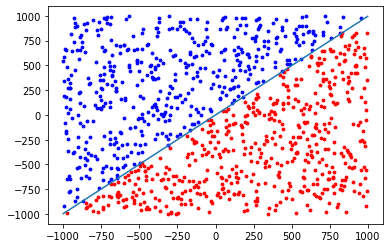

In [7]:
fig, ax = plt.subplots()

tamanho_da_reta = np.arange(-1000, 1000)

for i in n.dados:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        plt.scatter(x,y, color='r', s=8)
    else:
        plt.scatter(x,y, color='b', s=8)

m = -n.x1/n.x2
ax.plot(tamanho_da_reta, tamanho_da_reta*m)
plt.show()